In [43]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
import isbnlib
from isbnlib import meta
from isbnlib.registry import bibformatters
import json

In [2]:
data = pd.read_csv('rec-amz-Books.edges', header=None)

Histogram recenzii

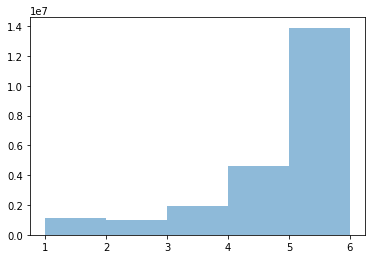

In [3]:
plt.hist(data[2], alpha=0.5, bins=[1,2,3,4,5,6])
plt.show()

Histogram stupna vrcholov knih

<AxesSubplot:ylabel='Frequency'>

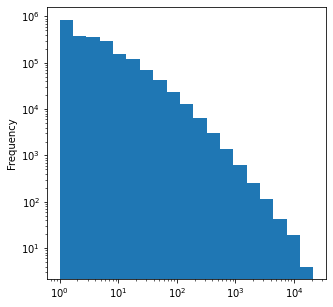

In [4]:
plt.figure(figsize=(5,5))
plt.yscale('log')
plt.xscale('log')
data[1].value_counts().plot(kind='hist', bins=np.logspace(np.log10(1),np.log10(21398), 20))

Histogram stupna vrcholov autorov recenzii

<AxesSubplot:ylabel='Frequency'>

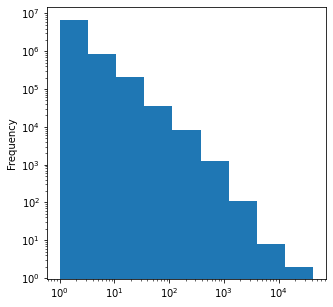

In [5]:
plt.figure(figsize=(5,5))
plt.yscale('log')
plt.xscale('log')
data[0].value_counts().plot(kind='hist', bins=np.logspace(np.log10(1),np.log10(43201), 10))

In [128]:
def from_ISBN_to_title(column):
    new_col = list()
    bibtex = bibformatters["json"]
    for value in column:
            try:
                isbn = str(value)
                SERVICE = 'openl'
                #print(isbn)
                new_col.append(json.loads(bibtex(meta(isbn, SERVICE)))['title'])
            except AttributeError:
                try:
                    isbn = str(value)
                    SERVICE = 'goob'
                    #print(isbn)
                    new_col.append(json.loads(bibtex(meta(isbn, SERVICE)))['title'])
                except:
                    new_col.append('-----------')
                    continue
            except isbnlib.NotValidISBNError:
                new_col.append('-----------')
            except:
                new_col.append('-----------')
    return new_col

In [50]:
data_100 = data.groupby(1).filter(lambda x : len(x)>100)  # tie, ktore maju aspon 100 recenzii

In [138]:
def get_top_x_reviewed(x, data):
    data_x = data.iloc[:x, :]
    top_x = data.groupby(1)[2].agg(np.mean).reset_index().sort_values(by=2, ascending=False).head(x)
    top_x.loc[:, 'Title']= from_ISBN_to_title(top_x[1])
    top_x = top_x.rename(columns={1:"ISBN", 2:'Mean of reviews'})
    return top_x

Top X najlepsie hodnotenych knih

In [139]:
get_top_x_reviewed(10, data_100)

,ISBN,Mean of reviews,Title
14867,0830766316,5.000000,Holding Your Family Together: 5 Simple Steps t...
16209,0983408904,5.000000,The Little Rose
15748,0972394648,4.992647,One
22718,1499390165,4.991803,Lethal bond
14992,0849381185,4.990566,Forensic Art and Illustration
12786,0757317723,4.986207,Ricochet - riding a wave of hope with the dog ...
25647,1939629071,4.983193,Motherhood Realized - An Inspiring Anthology f...
22715,1499381921,4.982857,Queenie Baby - On Tour
24662,1616387165,4.981308,Live Before You Die - Wake up to God's Will fo...
14778,0814416993,4.980769,Harvesting intangible assets - uncover hidden ...


In [140]:
def get_top_x_number_reviews(x, data):
    data_x = data[1].value_counts().head(x).reset_index()
    data_x.loc[:, 'Title']= from_ISBN_to_title(data_x['index'])
    data_x = data_x.rename(columns={1:"Number of reviews", 'index':'ISBN'})
    return data_x

In [141]:
get_top_x_number_reviews(20, data)

,ISBN,Number of reviews,Title
0,0439023483,21398,The Hunger Games
1,030758836X,19867,Gone Girl
2,0439023513,14114,Mockingjay
3,0385537859,12973,Inferno
4,0007444117,12629,Allegiant
5,0375831002,12571,The Book Thief
6,038536315X,12564,Sycamore row
7,0345803485,12290,Fifty Shades of Grey
8,0316055433,11746,The Goldfinch
9,0849922070,10424,Heaven is For Real Movie Edition
